# Data Analysis Project: E-Commerce Public Dataset
- **Nama:** Adriel Fabian Suryoto
- **Email:** adrielsuryoto@gmail.com
- **ID Dicoding:** adrielfs

## Defining Business Questions

- Which products have the highest and lowest sales?
- How much do customers spend on average, and how does it vary across different states?

## Import All Packages/Libraries Used

In [380]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

## Data Wrangling

### Gathering Data

In [381]:
# Directory containing the csv files
data_directory = "data/"

# Load dataset
customers = pd.read_csv(data_directory + 'customers_dataset.csv')
geolocations = pd.read_csv(data_directory + 'geolocation_dataset.csv')
order_items = pd.read_csv(data_directory + 'order_items_dataset.csv')
order_payments = pd.read_csv(data_directory + 'order_payments_dataset.csv')
order_reviews = pd.read_csv(data_directory + 'order_reviews_dataset.csv')
orders = pd.read_csv(data_directory + 'orders_dataset.csv')
product_category_translation = pd.read_csv(data_directory + 'product_category_name_translation.csv')
products = pd.read_csv(data_directory + 'products_dataset.csv')
sellers = pd.read_csv(data_directory + 'sellers_dataset.csv')


In [382]:
# Display the first 5 rows of the customers dataset
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [383]:
# Display the first 5 rows of the geolocations dataset
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [384]:
# Display the first 5 rows of the order_items dataset
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [385]:
# Display the first 5 rows of the order_payments dataset
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [386]:
# Display the first 5 rows of the order_reviews dataset
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [387]:
# Display the first 5 rows of the orders dataset
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [388]:
# Display the first 5 rows of the product_category_translation dataset
product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [389]:
# Display the first 5 rows of the products dataset
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [390]:
# Display the first 5 rows of the sellers dataset
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Data Gathering Insights

## 1. Customer Data
- The customer data provides valuable insights into customer locations, including city and state information. This allows businesses to analyze geographic patterns in customer behavior, helping to optimize marketing strategies and target key regions where customer engagement is higher.
  
- The `customer_unique_id` is a critical field for tracking individual customer behavior across multiple orders, helping businesses to analyze repeat purchases and customer loyalty.

## 2. Geolocation Data
- Geolocation data, including latitude and longitude, allows for geographical analysis of orders. By mapping the locations of orders, businesses can gain insights into regional demand and identify areas that are underserved or highly saturated.
  
- This data can also be used to optimize delivery routes, reduce shipping times, and improve overall supply chain efficiency by understanding the proximity of customers to distribution centers.

## 3. Order Items Data
- The order items dataset provides detailed information on products sold, including product IDs and seller IDs. This data can be used to analyze product popularity, seller performance, and the frequency of certain products being purchased.
  
- By looking at item-level data, businesses can also track trends in customer preferences, identifying best-selling products and those that are underperforming.

## 4. Payments Data
- The payments data provides insights into payment methods used by customers, which can help businesses understand which payment options are most popular and ensure they are offering the right variety of methods to suit customer preferences.
  
- This data can also reveal patterns in customer spending behavior, including how many installments are typically used and the average transaction value.

## 5. Product Data
- The product data offers a detailed view of the various items being sold, including product categories and physical dimensions. This data is crucial for inventory management, pricing strategies, and understanding product demand.
  
- Detailed product descriptions and categories enable better marketing and product placement, ensuring that products are appropriately grouped and showcased to customers.

## 6. Seller Data
- The seller dataset allows businesses to analyze the distribution of sellers across different regions, which can help identify high-performing sellers and regions that may benefit from additional seller recruitment.

- Understanding seller performance at a granular level enables businesses to provide targeted support and resources to underperforming sellers, helping them improve their sales.

## 7. Order Reviews Data
- The order reviews data is valuable for analyzing customer satisfaction and identifying areas for improvement. By examining review scores alongside textual feedback, businesses can pinpoint common issues that customers face and take action to address them.

- Sentiment analysis on reviews can provide deeper insights into customer feelings about specific products or services, helping to improve overall customer experience.

## Key Insights from the Data Gathering Process
1. **Customer Segmentation**: The geographic and unique customer identifiers allow for segmentation by region and customer type, providing a foundation for targeted marketing and engagement strategies.

2. **Regional Demand**: Geolocation data gives insights into where demand is highest, helping businesses optimize distribution and marketing efforts in key areas.

3. **Product Performance**: Detailed order items and product data allow for comprehensive product performance tracking, enabling businesses to identify best-sellers and adjust inventory accordingly.

4. **Payment Preferences**: Payment data highlights the payment options customers prefer, which can guide decisions on offering or promoting certain payment methods.

5. **Customer Feedback**: Review data provides a direct line to customer sentiment, allowing businesses to act on feedback to improve products and services.


### Assessing Data

In [391]:
# Dataset information
print('\n', customers.info())
print('\n', geolocations.info())
print('\n', order_items.info())
print('\n', order_payments.info())
print('\n', order_reviews.info())
print('\n', orders.info())
print('\n', product_category_translation.info())
print('\n', products.info())
print('\n', sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

In [392]:
# Missing values
print('\nMissing values in customers:\n', customers.isnull().sum())
print('\nMissing values in geolocations:\n', geolocations.isnull().sum())
print('\nMissing values in order items:\n', order_items.isnull().sum())
print('\nMissing values in order payments:\n', order_payments.isnull().sum())
print('\nMissing values in order reviews:\n', order_reviews.isnull().sum())
print('\nMissing values in orders:\n', orders.isnull().sum())
print('\nMissing values in product category translation:\n', product_category_translation.isnull().sum())
print('\nMissing values in products:\n', products.isnull().sum())
print('\nMissing values in sellers:\n', sellers.isnull().sum())



Missing values in customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing values in geolocations:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Missing values in order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing values in order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Missing values in order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     

In [393]:
# Duplicate rows
print('Duplicate rows in customers:', customers.duplicated().sum())
print('Duplicate rows in geolocations:', geolocations.duplicated().sum())
print('Duplicate rows in order items:', order_items.duplicated().sum())
print('Duplicate rows in order payments:', order_payments.duplicated().sum())
print('Duplicate rows in order reviews:', order_reviews.duplicated().sum())
print('Duplicate rows in orders:', orders.duplicated().sum())
print('Duplicate rows in product category translation:', product_category_translation.duplicated().sum())
print('Duplicate rows in products:', products.duplicated().sum())
print('Duplicate rows in sellers:', sellers.duplicated().sum())


Duplicate rows in customers: 0
Duplicate rows in geolocations: 261831
Duplicate rows in order items: 0
Duplicate rows in order payments: 0
Duplicate rows in order reviews: 0
Duplicate rows in orders: 0
Duplicate rows in product category translation: 0
Duplicate rows in products: 0
Duplicate rows in sellers: 0


In [394]:
# Summary statistics
print('\nSummary statistics for customers:\n', customers.describe(include='all'))
print('\nSummary statistics for geolocations:\n', geolocations.describe(include='all'))
print('\nSummary statistics for order items:\n', order_items.describe(include='all'))
print('\nSummary statistics for order payments:\n', order_payments.describe(include='all'))
print('\nSummary statistics for order reviews:\n', order_reviews.describe(include='all'))
print('\nSummary statistics for orders:\n', orders.describe(include='all'))
print('\nSummary statistics for product category translation:\n', product_category_translation.describe(include='all'))
print('\nSummary statistics for products:\n', products.describe(include='all'))
print('\nSummary statistics for sellers:\n', sellers.describe(include='all'))



Summary statistics for customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_p

# Data Assessment Insights

## 1. Missing Values
- **Order Reviews**: The significant number of missing values in `review_comment_title` and `review_comment_message` suggests that many customers provide only a review score without additional comments or titles. This indicates that the textual content of reviews may not fully represent customer feedback. If textual sentiment analysis is intended, this limitation must be considered.

- **Orders**: Missing values in columns like `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date` may indicate delays in processing or incomplete orders. Analyzing these missing entries can provide insights into operational inefficiencies or areas where customer service needs improvement.

- **Products**: The missing data in `product_category_name`, `product_name_length`, and `product_description_length` highlights inconsistencies in product data collection. This could result in gaps when analyzing product performance or understanding customer preferences by category or product description.

## 2. Product Weights (Products Dataset)
- The presence of zero values in the `product_weight_g` column indicates data entry errors. Products with a weight of zero cannot exist, and such data would skew analyses related to shipping costs, logistics, and product handling. These zero values should be investigated and replaced with valid data for accurate logistics analysis.

## 3. Duplicate Rows
- Even though no large number of duplicates were found, verifying that important fields such as `order_id` and `product_id` are not duplicated unnecessarily is crucial. Duplicate entries could distort sales reports, inventory management, and customer transaction tracking. Regular monitoring and cleaning for duplicates should be part of data maintenance.

## 4. Data Time Consistency (Orders Dataset)
- Missing delivery dates in the `order_delivered_customer_date` and `order_delivered_carrier_date` columns suggest that some orders might not have been delivered or were severely delayed. This is an important area for further investigation, as it could reveal bottlenecks in the supply chain, customer dissatisfaction, or issues with order fulfillment.

## 5. Review Scores and Comments
- The fact that many reviews are missing comments, especially in cases of low scores, might suggest that customers who are dissatisfied choose not to elaborate on their negative experiences. This presents an opportunity for businesses to encourage customers to provide more detailed feedback, which could be used to improve products or services.

## Key Insights from the Assessment
1. **Review Feedback**: The lack of detailed feedback in customer reviews implies that score-based review systems might not capture the full extent of customer opinions. Businesses might need to rethink how they encourage customers to leave more detailed reviews.

2. **Order Delivery Analysis**: Missing delivery dates are critical data points that, if not addressed, could distort any analysis related to shipping efficiency and customer satisfaction. Orders without delivery dates may also reflect lost revenue or customer dissatisfaction.

3. **Product Data Completeness**: The missing values in product data could hinder performance analysis and customer understanding. Without complete product descriptions or categories, businesses may face difficulties in optimizing product offerings or targeting the right audience.

4. **Weight Data Issues**: Incorrect weight data affects shipping and logistics, potentially leading to inaccurate shipping cost estimates, customer dissatisfaction, or inefficiencies in supply chain management.

5. **Duplicate Monitoring**: Though minimal duplication was found, regular audits of the data are necessary to ensure that duplicates do not accumulate over time, particularly in critical fields like `order_id` and `product_id`.


### Cleaning Data

In [395]:
# Handle missing values for 'review_comment_title' and 'review_comment_message' without inplace
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('')

print("\nMissing values handled for 'review_comment_title' and 'review_comment_message':")
print(order_reviews[['review_comment_title', 'review_comment_message']].isnull().sum())



Missing values handled for 'review_comment_title' and 'review_comment_message':
review_comment_title      0
review_comment_message    0
dtype: int64


In [396]:
# Drop rows with missing values in critical date columns for orders
orders_cleaned = orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])
print("\nMissing values handled for 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date':")
print(orders_cleaned.isnull().sum())


Missing values handled for 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date':
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [397]:
# Handle missing values in the products dataset
# Fill missing 'product_category_name' with 'Unknown', and for length, description, and photos, fill with median values
products['product_category_name'] = products['product_category_name'].fillna('Unknown')
products['product_name_lenght'] = products['product_name_lenght'].fillna(products['product_name_lenght'].median())
products['product_description_lenght'] = products['product_description_lenght'].fillna(products['product_description_lenght'].median())
products['product_photos_qty'] = products['product_photos_qty'].fillna(products['product_photos_qty'].median())

print("\nMissing values handled for 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty':")
print(products[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']].isnull().sum())



Missing values handled for 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty':
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
dtype: int64


In [398]:
# Handle product weights with 0 by replacing with the median weight
median_weight = products['product_weight_g'].median()
products['product_weight_g'] = products['product_weight_g'].replace(0, median_weight)

print("\nProduct weights with 0 replaced with median weight:")
print(products[products['product_weight_g'] == 0])


Product weights with 0 replaced with median weight:
Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


In [399]:
# Drop any remaining rows in 'products' with missing dimensions (weight, length, height, width)
products_cleaned = products.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
print("\nRemaining missing values handled for product dimensions:")
print(products_cleaned[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isnull().sum())



Remaining missing values handled for product dimensions:
product_weight_g     0
product_length_cm    0
product_height_cm    0
product_width_cm     0
dtype: int64


In [400]:
# Remove duplicates
customers_cleaned = customers.drop_duplicates()
geolocations_cleaned = geolocations.drop_duplicates()
order_items_cleaned = order_items.drop_duplicates()
order_payments_cleaned = order_payments.drop_duplicates()
order_reviews_cleaned = order_reviews.drop_duplicates()
product_category_translation_cleaned = product_category_translation.drop_duplicates()
sellers_cleaned = sellers.drop_duplicates()

print("\nDuplicate rows removed from datasets:")
print(f"Customers: {customers_cleaned.shape}")
print(f"Geolocations: {geolocations_cleaned.shape}")
print(f"Order Items: {order_items_cleaned.shape}")
print(f"Order Payments: {order_payments_cleaned.shape}")
print(f"Order Reviews: {order_reviews_cleaned.shape}")
print(f"Product Category Translation: {product_category_translation_cleaned.shape}")
print(f"Sellers: {sellers_cleaned.shape}")


Duplicate rows removed from datasets:
Customers: (99441, 5)
Geolocations: (738332, 5)
Order Items: (112650, 7)
Order Payments: (103886, 5)
Order Reviews: (99224, 7)
Product Category Translation: (71, 2)
Sellers: (3095, 4)


# Data Cleaning Insights

## 1. Order Reviews
- Missing values in the columns `review_comment_title` and `review_comment_message` were filled with empty strings.
- This allows for complete analysis of reviews, even though many reviews don't have titles or detailed comments. It prevents any interruption in analyzing review scores alongside the presence or absence of textual feedback.
  
## 2. Orders
- Rows with missing values in the columns `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date` were dropped.
- This ensures that the analysis of delivery and processing times is based on complete and reliable data. This clean dataset will allow more accurate insights into delivery performance and delays.

## 3. Products
- Missing values in `product_category_name`, `product_name_lenght`, `product_description_lenght`, and `product_photos_qty` were filled with median values, or 'Unknown' where applicable.
- This allows for consistent analysis across products without being skewed by missing data. Having uniform categories and product details enables a more accurate understanding of product features and performance.
  
- Zero values in `product_weight_g` were replaced with the median weight, preventing skewed analysis in product logistics or shipping weight analysis.

## 4. Duplicates
- Duplicate rows were removed across datasets, ensuring data integrity.
- This step improves the overall reliability of the data for analysis, reducing noise that could arise from duplicate entries.

## 5. Data Time Consistency
- Orders with missing `order_delivered_customer_date` and `order_delivered_carrier_date` were removed, allowing for a cleaner dataset.
- This ensures that analyses regarding order delivery times, delays, or processing durations are accurate, as only fully complete order data is used.

## Key Insights
1. **Reviews**: A significant portion of reviews lacks detailed textual feedback, suggesting that many customers prefer to leave only a score. This insight may influence strategies for improving customer engagement with the review system.
   
2. **Orders**: By removing incomplete order records, the dataset can now be used to accurately assess shipping times, late deliveries, and processing efficiency.
   
3. **Products**: The presence of missing product details highlights areas where data collection could be improved. Products with missing categories or descriptions may need to be further classified to enable better product insights.
   
4. **Zero Weights**: Products with zero weights have been corrected, ensuring that logistics or cost analyses, especially in relation to shipping, will not be skewed by erroneous data.
   
5. **Duplicate Removal**: By removing duplicates, the dataset becomes more trustworthy, allowing for cleaner and more precise insights into customer behavior, product performance, and sales trends.

## Exploratory Data Analysis (EDA)

### Explore Customers

In [401]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
32663,6e7d605466ed1b66ed29878c722fc992,3e6d325542e18c36a06af561ee2f123e,23073,rio de janeiro,RJ
46283,9eb793d1939a97ed213e8e7415947d8e,7af9180714aa1b1b4ac52586022c6f0a,22260,rio de janeiro,RJ
76816,fc041ede47154c40f55455e20c1a1954,8435a9cfc61e4cc170e657e9bce90f22,11015,santos,SP
67458,7774aed347f74a1c12aaf3c628cef273,4c7d1c2a797c67682dd1fa54486498a2,88015,florianopolis,SC
77895,9b87b9bb4f1b6cd001096294c21970c8,368e9869175b8fe86c8d372fc05e95db,75690,caldas novas,GO


In [402]:
customers_by_city = customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customers_by_city

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [403]:
customers_by_state = customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
customers_by_state

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore payments

In [404]:
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
23243,decf73db7f53552bc92e1720be4f0995,1,credit_card,6,100.19
9482,60010855666a66aea041b24e231cbf12,1,credit_card,3,283.32
15964,93709cc8ac5e38fe6622dcebd2ce72bf,1,credit_card,1,166.33
74670,e5e34f7a2aebfe043a405c831b556f1e,1,credit_card,3,35.38
42298,91ea7a06795c4dc4544b5ef64d3e56e2,1,credit_card,10,161.29


In [405]:
payments_by_type = order_payments.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
payments_by_type

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore orders

In [406]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
85306,f037570b9dc59fcdd25a6d3e87135ce4,fc1533d533d97f6b04f4eefcbc1868b5,delivered,2018-05-26 00:34:58,2018-05-26 08:35:17,2018-05-28 14:08:00,2018-06-07 20:12:18,2018-06-28 00:00:00
22619,a6d412851f5ec3967d9664d3654be93f,b104f8e5aae38a58aec1bc28bb05ff15,delivered,2018-08-13 08:34:05,2018-08-13 09:04:24,2018-08-13 15:47:00,2018-08-22 21:18:53,2018-08-28 00:00:00
32231,5ebc0e4396ff850d059771c6a0a3b4ab,8f328c1ccdd8ca4e1c18d6a31ed528db,delivered,2018-08-03 14:48:25,2018-08-03 15:04:13,2018-08-06 15:23:00,2018-08-16 22:54:26,2018-09-06 00:00:00
71622,b8667450c5709608993ae7ff3880e3c0,a8e85fd5c346013715e2d92ad37bd3fe,delivered,2018-02-05 19:59:57,2018-02-06 13:47:56,2018-02-07 14:43:01,2018-02-15 18:55:18,2018-03-02 00:00:00
4435,a1f115db2222fcb78c129bf36d76d4dd,1bfe620be823518320575a61861437ea,delivered,2017-11-11 09:43:39,2017-11-14 04:10:29,2017-11-14 16:54:22,2017-11-23 19:35:26,2017-12-05 00:00:00


In [407]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

orders['delivered_on_time'] = orders['order_delivered_customer_date'] <= orders['order_estimated_delivery_date']

orders['delivered_on_time'].describe()


count     99441
unique        2
top        True
freq      88649
Name: delivered_on_time, dtype: object

### Explore customers_df & orders_df

#### Merge customers & orders

In [408]:
customers_orders_df = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,True
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,True
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,True
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,True


#### Merge payments & reviews

In [409]:
payments_reviews_df = pd.merge(
    left=order_payments,
    right=order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,,,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,,,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,,,2017-12-21 00:00:00,2017-12-22 01:10:39


In [410]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27 00:00:00,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04 00:00:00,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaN,NaN
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,,,2017-06-06 00:00:00,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,,A mercadoria não foi entregue. Entrara em cont...,2017-05-21 00:00:00,2017-05-24 16:21:27
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,,A mercadoria não foi entregue. Entrara em cont...,2017-05-21 00:00:00,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17 00:00:00,2018-08-18 15:32:40
57753,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28 00:00:00,2018-08-28 18:25:55


In [411]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})


order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

#### Merge customers_orders & payment_orders

In [412]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,,,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,,,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,,,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,,,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


### Explore items & sellers

#### Merge items & sellers 

In [413]:
item_seller_df = pd.merge(
    left=order_items,
    right=sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [414]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)


seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [415]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore products & category

#### Merge products & category

In [416]:
product_df = pd.merge(
    left=products,
    right=product_category_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [417]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)


product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [418]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)


product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

#### Merge product_df & item_seller_df

In [419]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [420]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55908,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,8,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG


In [421]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore geolocations

In [422]:
geolocations.sample(5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
214690,8737,-23.538151,-46.202643,mogi das cruzes,SP
864580,83602,-25.471097,-49.540679,campo largo,PR
785236,71605,-15.857807,-47.916609,brasilia,DF
698005,46980,-12.247278,-41.618268,iraquara,BA
887793,86300,-23.181707,-50.656353,cornelio procopio,PR


In [423]:
geolocations.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)


geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
1200        1
1189        1
1290        1
1262        1
39523       1
Length: 19015, dtype: int64

In [424]:
geolocations[geolocations['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


### Explore all data

#### Merge all data

In [425]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,20.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [426]:
all_data_df = all_data.drop_duplicates('order_id')

In [427]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  object        
 8   order_approved_at              99281 non-null  object        
 9   order_delivered_carrier_date   97658 non-null  object        
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated_del

In [428]:
state_payment_aggregation = all_data_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

state_payment_aggregation.head(50)


,order_id,payment_value
customer_state,,
SP,41746,5902792.84
RJ,12852,2105818.36
MG,11635,1843591.21
RS,5466,875252.55
PR,5045,800040.80
SC,3637,614981.34
BA,3380,602100.20
DF,2140,348142.92
GO,2020,344879.28


In [429]:
category_review_aggregation = all_data_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})
category_review_aggregation.columns = ['order_id_nunique', 'review_score_min', 'review_score_max']
category_review_aggregation.head(100)

,order_id_nunique,review_score_min,review_score_max
product_category_name_english,,,
agro_industry_and_commerce,182,1.0,5.0
air_conditioning,251,1.0,5.0
art,198,1.0,5.0
arts_and_craftmanship,22,1.0,5.0
audio,347,1.0,5.0
...,...,...,...
stationery,2299,1.0,5.0
tablets_printing_image,79,1.0,5.0
telephony,4184,1.0,5.0


#### Conver all_data_df to .csv

In [430]:
output_csv_path = "dashboard/all_data_df.csv"
all_data_df.to_csv(output_csv_path, index=False)

# Exploratory Data Analysis (EDA) Insights

## 1. Product Category Performance and Reviews
- **Popular Categories**: Categories like "telephony," "toys," and "watches_gifts" have a high number of unique orders, indicating they are top-selling product categories.
- **Review Score Distribution**: Most product categories have review scores ranging from 1 (low) to 5 (high), indicating varying levels of customer satisfaction across products.
- **Actionable Insight**: Focus on categories with low review scores to investigate and address potential quality issues or misaligned customer expectations.

## 2. Customer Spending by Region
- **State-wise Spending**: High spending regions can be identified by aggregating `payment_value` by `customer_state`. Regions with higher spending may require optimized logistics and marketing efforts.
- **Actionable Insight**: Identify and target regions with lower spending to boost demand through promotions or to address supply chain issues.

## 3. Order Frequency by Customer State
- **High Order Frequency**: States with a higher number of unique orders indicate strong demand, helping with inventory management and distribution optimization.
- **Actionable Insight**: Focus promotional campaigns on regions with low order frequency to drive sales or resolve regional issues such as product availability.

## 4. Review Score Trends
- **High-Variance Categories**: Product categories with wide review score ranges may indicate inconsistent product quality.
- **Actionable Insight**: Monitor these categories closely and address customer complaints to improve customer satisfaction.

## 5. Payment and Review Correlations
- **Payment Type vs. Review Quality**: Payment types may correlate with review scores, where certain payment methods could be linked to customer frustration or lower reviews.
- **Actionable Insight**: Improving the customer payment experience or offering incentives for specific payment methods can lead to better reviews.

## 6. Geographic Insights (with Geolocation Data)
- **Delivery Delays**: Some regions may experience more frequent delivery delays, highlighting inefficiencies in the supply chain.
- **Actionable Insight**: Optimize delivery routes and distribution centers to reduce delivery times in under-served regions.

## 7. Outliers in Review Scores
- **Categories with Consistently Low Reviews**: Some categories have consistently low reviews, indicating potential product or customer experience issues.
- **Actionable Insight**: Investigate and improve product quality or set better customer expectations through clearer product descriptions.

## 8. Seasonal or Date-based Insights
- **Purchase Trends**: Time-based analysis on `order_purchase_timestamp` could uncover purchase spikes during holidays or events.
- **Actionable Insight**: Better inventory planning and marketing strategies during peak seasons can boost sales and improve operations.


## Visualization & Explanatory Analysis

### Question 1: Which products have the highest and lowest sales?

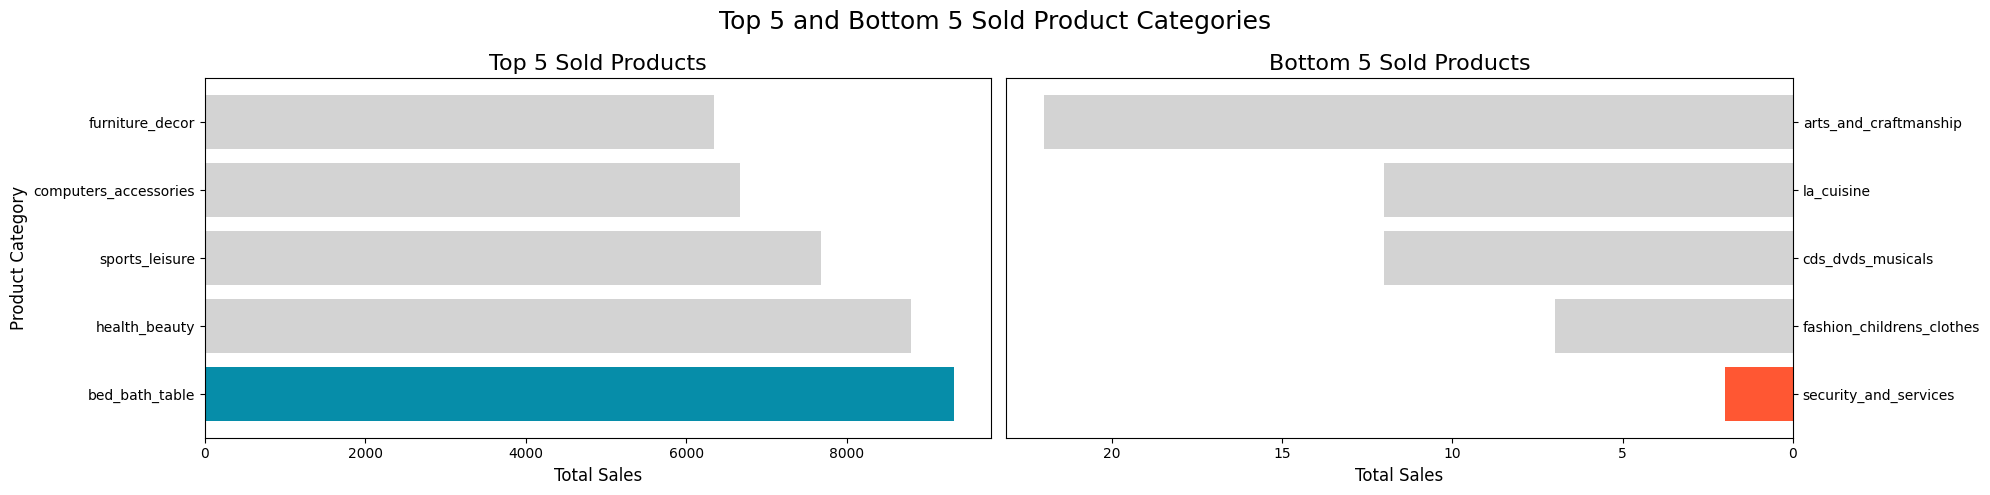

In [431]:
# Group the data by product category and count the total sales (number of products sold per category)
sum_order_items_df = all_data_df.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})

# Sort the data in descending order based on the total number of products sold
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)

# Create subplots with 1 row and 2 columns, and set the figure size
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Select the top 5 most sold products
top_5 = sum_order_items_df.head(5)

# Plot a horizontal bar chart for the top 5 sold products with the first bar colored differently
ax[0].barh(top_5['product_category_name_english'], top_5['products'], color=["#068DA9"] + ["#D3D3D3"] * 4)
ax[0].set_ylabel("Product Category", fontsize=12)
ax[0].set_xlabel("Total Sales", fontsize=12)
ax[0].set_title("Top 5 Sold Products", loc="center", fontsize=16)
ax[0].tick_params(axis='y', labelsize=10)

# Select the bottom 5 least sold products by sorting in ascending order
bottom_5 = sum_order_items_df.sort_values(by="products", ascending=True).head(5)

# Plot a horizontal bar chart for the bottom 5 sold products with the first bar colored differently
ax[1].barh(bottom_5['product_category_name_english'], bottom_5['products'], color=["#FF5733"] + ["#D3D3D3"] * 4)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Sales", fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom 5 Sold Products", loc="center", fontsize=16)
ax[1].tick_params(axis='y', labelsize=10)
plt.suptitle("Top 5 and Bottom 5 Sold Product Categories", fontsize=18)
plt.tight_layout()
plt.show()


### Question 2: How much do customers spend on average, and how does it vary across different states?

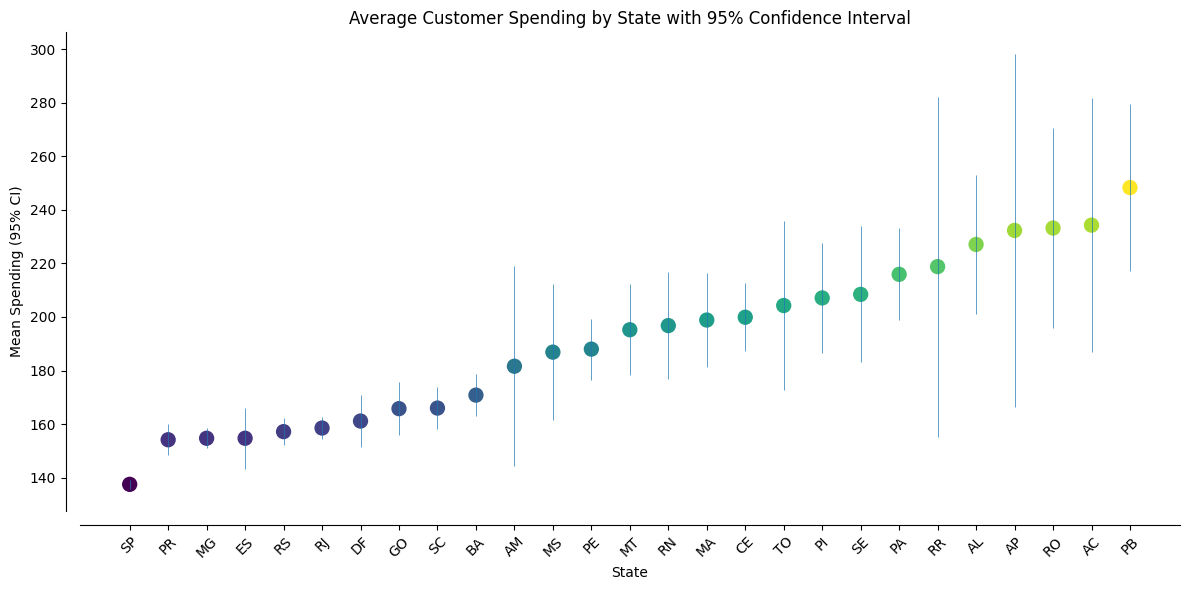

In [432]:
# Estimate mean and confidence interval for customers in each state
customer_regions = pay_ord_cust.groupby('customer_state').agg({
    'payment_value': ['mean', 'std'],
    'customer_unique_id': 'count'
}).reset_index()

# Calculate confidence intervals for each state
cis = stats.t.interval(
    0.95, 
    loc=customer_regions['payment_value']['mean'], 
    scale=customer_regions['payment_value']['std'] / np.sqrt(customer_regions['customer_unique_id']['count']), 
    df=customer_regions['customer_unique_id']['count'] - 1
)

# Add confidence interval columns
customer_regions['ci_low'] = cis[0]
customer_regions['ci_hi'] = cis[1]

# Matplotlib adjustments
def default_plot(ax, spines):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
    return ax

# Sort states for better visualization
plot = customer_regions.sort_values(by=('payment_value', 'mean'))

# Plot mean transaction amounts with confidence intervals
fig, ax = plt.subplots(figsize=(12, 6))
ax = default_plot(ax, ['left', 'bottom'])
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Mean Spending (95% CI)')
plt.scatter(plot['customer_state'], plot['payment_value']['mean'], s=100, c=plot['payment_value']['mean'])
plt.vlines(plot['customer_state'], plot['ci_low'], plot['ci_hi'], lw=0.5)
plt.title('Average Customer Spending by State with 95% Confidence Interval')
plt.tight_layout()
plt.show()


# Insights

## Question 1: Which products have the highest and lowest sales?
- The **Top 5 Sold Products** reveal that the product category `bed_bath_table` has the highest number of sales, followed by `health_beauty`, `sports_leisure`, `computers_accessories`, and `furniture_decor`. This suggests that customers prioritize household, health, and leisure products the most. The significant lead in sales by `bed_bath_table` indicates a strong demand for these types of products, possibly driven by the growing importance of home comfort.
  
- The **Bottom 5 Sold Products** show categories like `security_and_services`, `fashion_childrens_clothes`, `cds_dvds_musicals`, `la_cuisine`, and `arts_and_craftmanship` have the lowest sales. These categories may be niche, or the demand for such products might be seasonal or declining. The exceptionally low sales of the `security_and_services` category suggest it may not resonate with the current customer base or may be highly specialized.

## Question 2: How much do customers spend on average, and how does it vary across different states?
- From the **Average Customer Spending by State with 95% Confidence Interval** plot, we can observe that customers in **PB (Paraíba)**, **AC (Acre)**, and **RO (Rondônia)** have the highest average spending, with a mean customer spend above 250. On the other hand, **SP (São Paulo)**, the state with the highest number of customers, has the lowest average spending of around 140.
  
- There is a noticeable variation in spending across states, with certain regions having a **higher propensity to spend** than others. This disparity could be due to varying economic conditions, cultural preferences, or regional market penetration differences.


## Conclusion

### Question 1: Which products have the highest and lowest sales?
- The analysis indicates that the company’s best-selling products revolve around home goods and personal care, while certain specialized categories lag significantly in terms of sales. Efforts to maximize sales should focus on maintaining the dominance of the top categories while exploring strategies to boost the bottom categories, potentially through promotions or better product positioning.

### Question 2: How much do customers spend on average, and how does it vary across different states?
- There is a clear variation in customer spending based on geographic location, with some regions exhibiting significantly higher average spending than others. These insights can inform **targeted marketing campaigns** and **regional product optimization**, allowing the company to better cater to high-value regions while identifying opportunities to boost spending in lower-value ones.
